In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/Users/anchanghun/Downloads/diabetes.csv")


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y = df['Outcome']
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [6]:
X = X.values

In [7]:
y = pd.get_dummies(y).values

In [8]:
from sklearn.preprocessing import RobustScaler
# 특성 정규화
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 8), (614, 2), (154, 8), (154, 2))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='softmax'))


model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 270 (1.05 KB)
Trainable params: 270 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
epochs = 30
model_history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5293 - val_loss: 0.6691 - val_accuracy: 0.6753
Epoch 2/30
20/20 [==============================] - 0s 855us/step - loss: 0.6679 - accuracy: 0.6401 - val_loss: 0.6460 - val_accuracy: 0.6948
Epoch 3/30
20/20 [==============================] - 0s 868us/step - loss: 0.6551 - accuracy: 0.6417 - val_loss: 0.6314 - val_accuracy: 0.6948
Epoch 4/30
20/20 [==============================] - 0s 903us/step - loss: 0.6498 - accuracy: 0.6417 - val_loss: 0.6215 - val_accuracy: 0.6948
Epoch 5/30
20/20 [==============================] - 0s 852us/step - loss: 0.6456 - accuracy: 0.6417 - val_loss: 0.6184 - val_accuracy: 0.6948
Epoch 6/30
20/20 [==============================] - 0s 818us/step - loss: 0.6430 - accuracy: 0.6417 - val_loss: 0.6149 - val_accuracy: 0.6948
Epoch 7/30
20/20 [==============================] - 0s 819us/step - loss: 0.6417 - accuracy: 0.6417 - val_loss: 0.6123 - val_accuracy: 0.6948
Epoch 8/

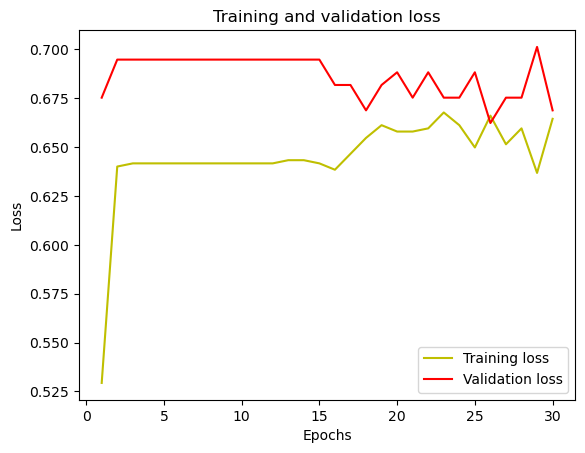

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

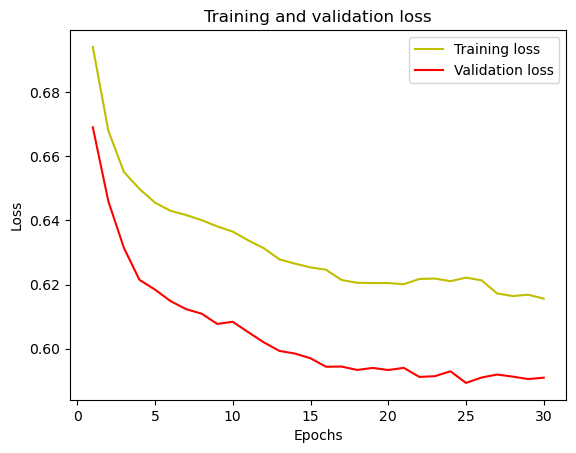

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

5/5 [==============================] - 0s 738us/step
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       107
           1       0.46      0.47      0.46        47

    accuracy                           0.67       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.67      0.67      0.67       154

[[81 26]
 [25 22]]


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       107
           1       0.46      0.47      0.46        47

    accuracy                           0.67       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.67      0.67      0.67       154

[[81 26]
 [25 22]]
